# Exploratory Data Analysis (EDA)

## Introduction
In this Exploratory Data Analysis, we aim to gain initial insights into the Utah real estate market by investigating property characteristics and their relationship to listing prices. Key variables such as property size (sqft), number of bedrooms, and lot size will be analyzed to identify trends, distributions, and correlations. Additionally, we’ll explore how factors like property type and location influence prices. This EDA will serve as a foundation for more advanced inferential and predictive analysis, helping us better understand the drivers of property value.

### Import and Load the Dataset

In [6]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Loading the Clean & Transformed Data
path = ('../data/cleaned_real_estate_utah.csv')
cleanedrs_data = pd.read_csv(path)

In [4]:
cleanedrs_data.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,...,type_condo_townhome_rowhome_coop.3,type_condos.3,type_farm.3,type_land.3,type_mobile.3,type_other.3,type_single_family.3,type_townhomes.3,type_townhouse.3,status_encoded
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,...,False,False,False,False,False,False,True,False,False,0
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,...,False,False,False,False,False,False,True,False,False,0
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,...,False,False,False,False,False,False,True,False,False,0
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,...,False,False,False,False,False,False,True,False,False,0
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,...,False,False,False,True,False,False,False,False,False,0


## Descriptive Analysis Questions
A series of questions designed to explore distributions, central tendencies, and basic patterns in the data. The questions we will be answering are:

- What is the distribution of listing prices?
- What is the distribution of square footage (sqft)?
- What are the most common property types and their average prices?
- How does the number of bedrooms relate to the listing price?
- How are lot size (lot_sqft) and property size (sqft) correlated?
- What is the distribution of properties by year built?
- Does having a garage significantly affect the listing price?
- How do different property statuses (e.g., sold, listed) compare in terms of listing prices?


## Descriptive Statistics
To showcase the descriptive statistics we can use the .describe method to answer a few questions and take a look at distribution among items.

In [5]:
cleanedrs_data.describe()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,listPrice,status_encoded
count,4440.000000,4440.000000,4440.000000,4440.000000,4440.000000,4440.000000,4.440000e+03,4440.000000,4440.000000,4.440000e+03,4440.000000
mean,1997.942793,3.894595,2.454730,2.238964,1.025000,2.334234,5.525239e+05,2712.318243,1.999775,7.966044e+05,0.057432
std,23.609067,1.265647,1.789238,1.165071,0.194672,1.024810,1.134471e+07,1553.676432,0.629134,1.731703e+06,0.232693
min,1860.000000,1.000000,0.000000,1.000000,1.000000,0.000000,4.360000e+02,0.000000,1.000000,0.000000e+00,0.000000
25%,1997.000000,3.000000,2.000000,2.000000,1.000000,2.000000,9.583000e+03,1842.000000,2.000000,3.538050e+05,0.000000
50%,2003.000000,4.000000,3.000000,2.000000,1.000000,2.000000,1.393900e+04,2400.000000,2.000000,5.289950e+05,0.000000
75%,2007.000000,4.000000,3.000000,3.000000,1.000000,2.000000,2.439400e+04,3132.000000,2.000000,7.549000e+05,0.000000
max,2026.000000,19.000000,45.000000,45.000000,6.000000,20.000000,6.009538e+08,20905.000000,4.000000,4.800000e+07,1.000000


### Answering the Descriptive Analysis Questions

### What is the distribution of listing prices?
- We are going to explore the range, mean, and median of list prices, using histograms or box plots.

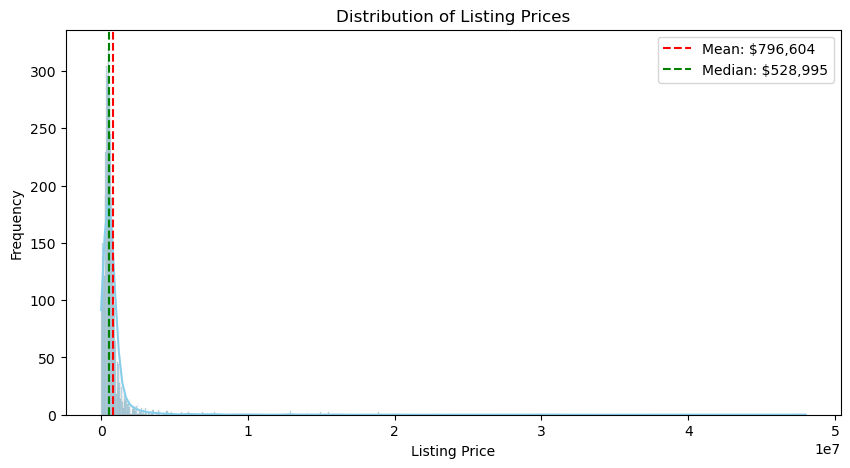

Range of Listing Prices: 0.0 to 48000000.0
Mean Listing Price: 796604.3806306307
Median Listing Price: 528995.0


In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(cleanedrs_data['listPrice'], kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Listing Price')
plt.ylabel('Frequency')
plt.axvline(cleanedrs_data['listPrice'].mean(), color='red', linestyle='--', label=f'Mean: ${cleanedrs_data["listPrice"].mean():,.0f}')
plt.axvline(cleanedrs_data['listPrice'].median(), color='green', linestyle='--', label=f'Median: ${cleanedrs_data["listPrice"].median():,.0f}')
plt.legend()
plt.show()

print("Range of Listing Prices:", cleanedrs_data['listPrice'].min(), "to", cleanedrs_data['listPrice'].max())
print("Mean Listing Price:", cleanedrs_data['listPrice'].mean())
print("Median Listing Price:", cleanedrs_data['listPrice'].median())

The range of listing prices spans from $0 to $48,000,000, with an average (mean) listing price of approximately $796,604 and a median listing price of about $528,995. This suggests a high skew in the data, with a few ultra-high listings pulling the mean above the median. Most properties are priced below the median, indicating a substantial portion of more affordable properties alongside a few high-priced outliers.

### What is the distribution of square footage (sqft)?
- Identify average home sizes and variances, and visualize with histograms.

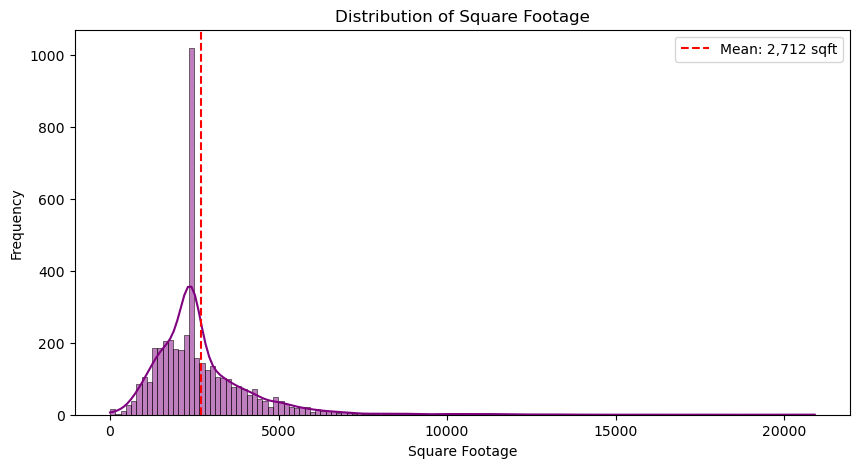

Mean Square Footage: 2712.318243243243
Variance of Square Footage: 2413910.4553553103


In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(cleanedrs_data['sqft'], kde=True, color='purple', edgecolor='black')
plt.title('Distribution of Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Frequency')
plt.axvline(cleanedrs_data['sqft'].mean(), color='red', linestyle='--', label=f'Mean: {cleanedrs_data["sqft"].mean():,.0f} sqft')
plt.legend()
plt.show()

print("Mean Square Footage:", cleanedrs_data['sqft'].mean())
print("Variance of Square Footage:", cleanedrs_data['sqft'].var())

The average property size is 2,712 sqft, with a variance of approximately 2,413,910 sqft, indicating wide differences in property sizes. This high variance suggests that the dataset includes a mix of smaller homes and larger estates. The histogram shows a distribution skewed towards smaller homes, with a long tail extending towards larger properties.

### What are the most common property types and their average prices?
- Use bar charts to show average list prices by property type (e.g., single-family homes, condos).

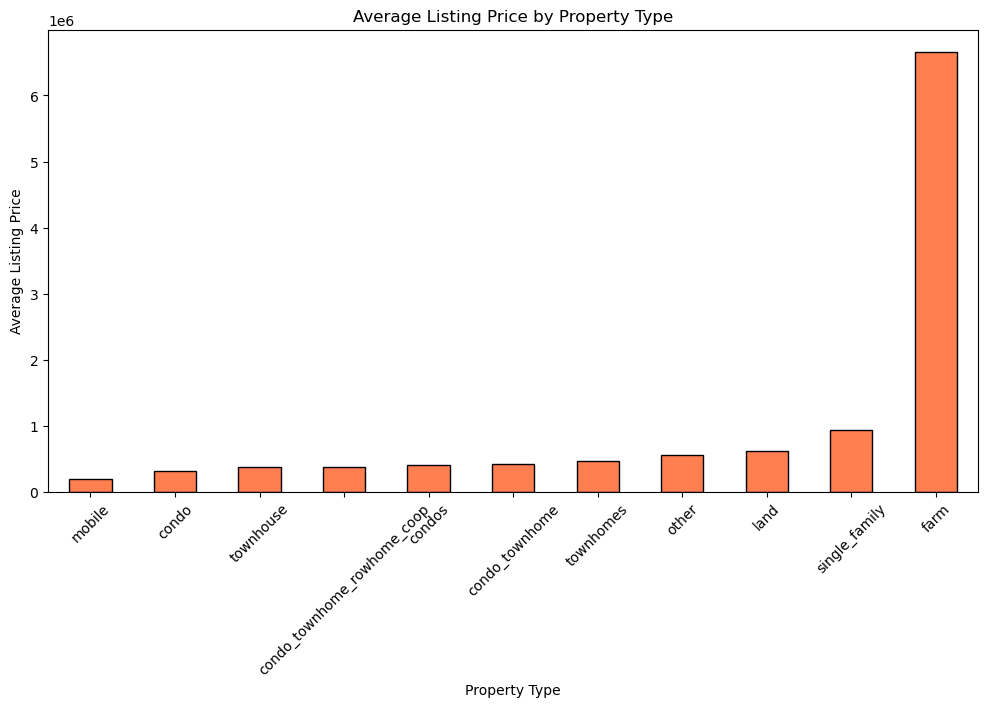

In [30]:
plt.figure(figsize=(12, 6))
property_type_prices = cleanedrs_data.groupby('type')['listPrice'].mean().sort_values()
property_type_prices.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Average Listing Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Listing Price')
plt.xticks(rotation=45)
plt.show()

Single-family homes and farm properties are the most common property types. Farms have the highest average listing prices, likely due to larger land size and unique features. Single-family homes are more affordable on average, suggesting that these properties are more accessible for a broader range of buyers and may have a more balanced price distribution.

### How does the number of bedrooms relate to the listing price?
- Scatter plot or bar chart to illustrate average price based on bedroom count.

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_42705/1325458260.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cleanedrs_data, x='beds', y='listPrice', estimator='mean', ci=None, palette='Blues')
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_42705/1325458260.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleanedrs_data, x='beds', y='listPrice', estimator='mean', ci=None, palette='Blues')


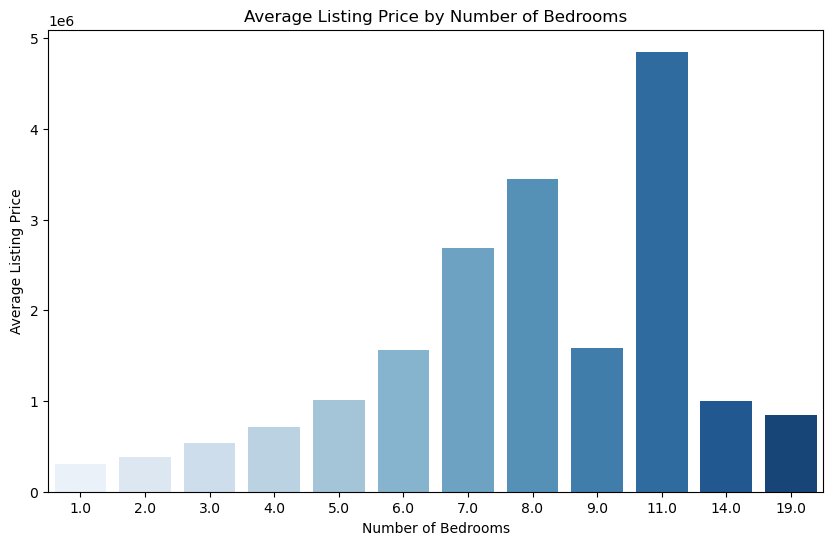

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cleanedrs_data, x='beds', y='listPrice', estimator='mean', ci=None, palette='Blues')
plt.title('Average Listing Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Listing Price')
plt.show()

Single-family homes and farm properties are the most common property types. Farms have the highest average listing prices, likely due to larger land size and unique features. Single-family homes are more affordable on average, suggesting that these properties are more accessible for a broader range of buyers and may have a more balanced price distribution.

### How are lot size (lot_sqft) and property size (sqft) correlated?
- Scatter plot and correlation analysis to determine any relationship.

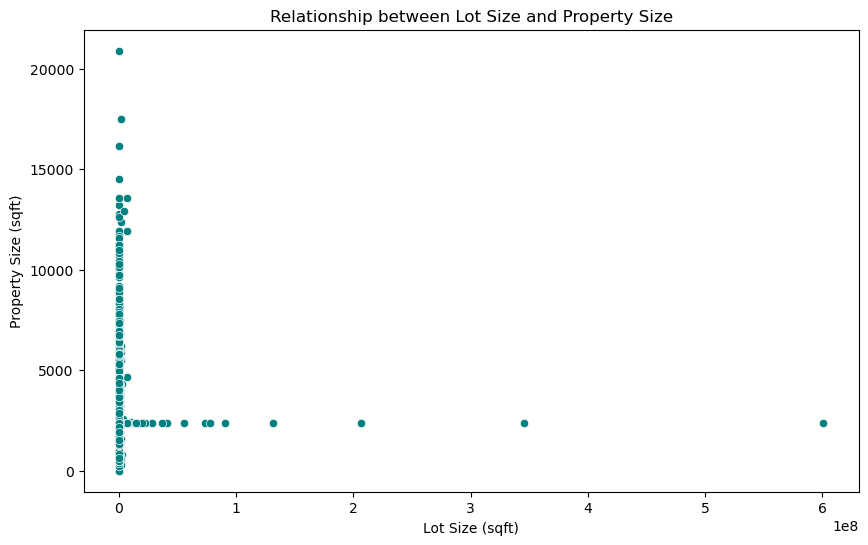

Correlation between Lot Size and Property Size: -0.004828257534814362


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cleanedrs_data, x='lot_sqft', y='sqft', color='teal')
plt.title('Relationship between Lot Size and Property Size')
plt.xlabel('Lot Size (sqft)')
plt.ylabel('Property Size (sqft)')
plt.show()

lot_size_corr = cleanedrs_data['lot_sqft'].corr(cleanedrs_data['sqft'])
print("Correlation between Lot Size and Property Size:", lot_size_corr)

The correlation coefficient between lot size and property size is -0.0048, indicating virtually no correlation. This suggests that the size of a property’s lot does not reliably predict the actual square footage of the building, likely due to a wide variety of lot sizes across property types and locations.

### What is the distribution of properties by year built?
- Histogram to show common construction years, as well as the oldest and newest properties.

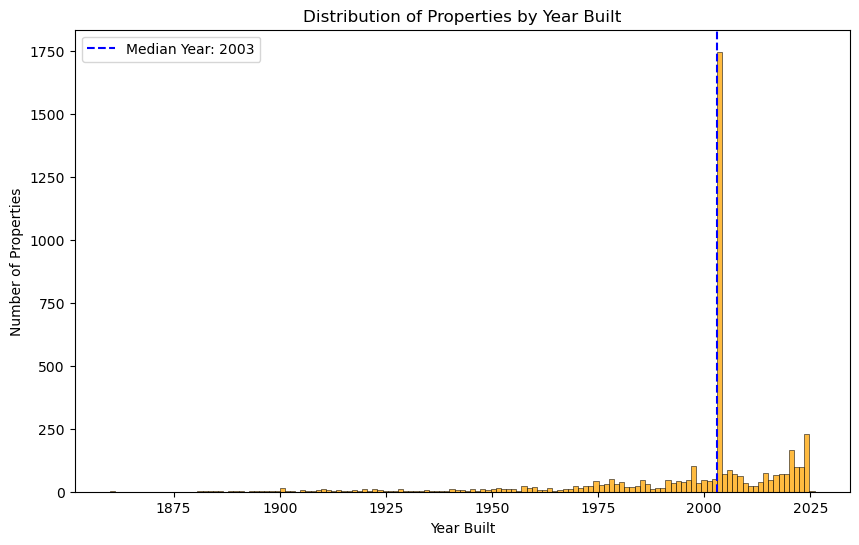

Oldest Property Year Built: 1860.0
Newest Property Year Built: 2026.0


In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(cleanedrs_data['year_built'], bins='auto', color='orange', edgecolor='black')
plt.title('Distribution of Properties by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Number of Properties')
plt.axvline(cleanedrs_data['year_built'].median(), color='blue', linestyle='--', label=f'Median Year: {int(cleanedrs_data["year_built"].median())}')
plt.legend()
plt.show()

print("Oldest Property Year Built:", cleanedrs_data['year_built'].min())
print("Newest Property Year Built:", cleanedrs_data['year_built'].max())

Most properties were constructed in 2003, with a left-skewed distribution indicating that the majority of homes in this dataset are relatively new. The oldest property was built in 1860, while the newest one is planned for completion in 2026, highlighting a range of historic and modern properties within the dataset.

### Does having a garage significantly affect the listing price?

- Box plot to compare average prices of properties with and without garages.

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_42705/2389876802.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_garage, x='garage', y='listPrice', palette='Set2')


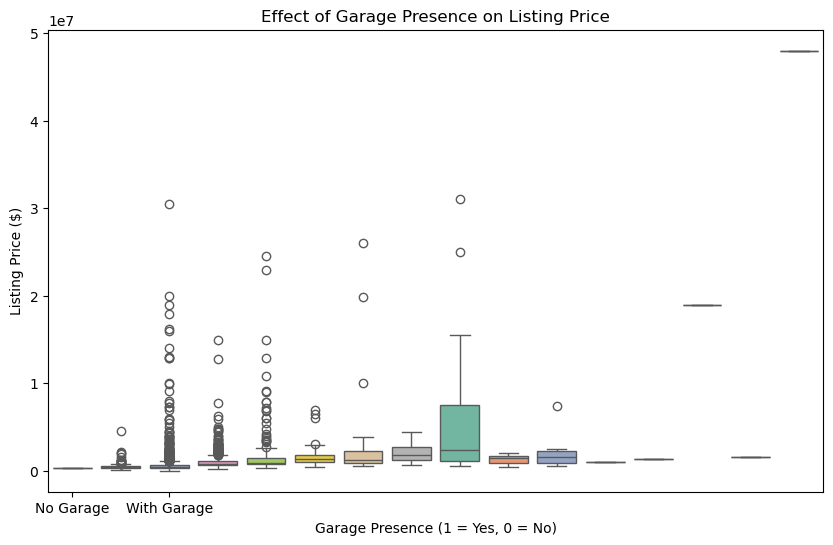

In [38]:
# Filter out missing or ambiguous values in the 'garage' column for clear comparison
if 'garage' in cleanedrs_data.columns:
    df_garage = cleanedrs_data[cleanedrs_data['garage'].notnull()]  # Ensure no NaN or ambiguous entries
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_garage, x='garage', y='listPrice', palette='Set2')
    plt.title('Effect of Garage Presence on Listing Price')
    plt.xlabel('Garage Presence (1 = Yes, 0 = No)')
    plt.ylabel('Listing Price ($)')
    plt.xticks([0, 2], labels=['No Garage',   'With Garage'])
    plt.show()


### How do different property statuses (e.g., sold, listed) compare in terms of listing prices?

- Bar chart to show price differences across property status categories.

/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_42705/147004126.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=cleanedrs_data, x='status', y='listPrice', estimator='mean', ci=None, palette='coolwarm')
/var/folders/p9/l56kxrqj1f50k63kvkm8k0nm0000gp/T/ipykernel_42705/147004126.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleanedrs_data, x='status', y='listPrice', estimator='mean', ci=None, palette='coolwarm')


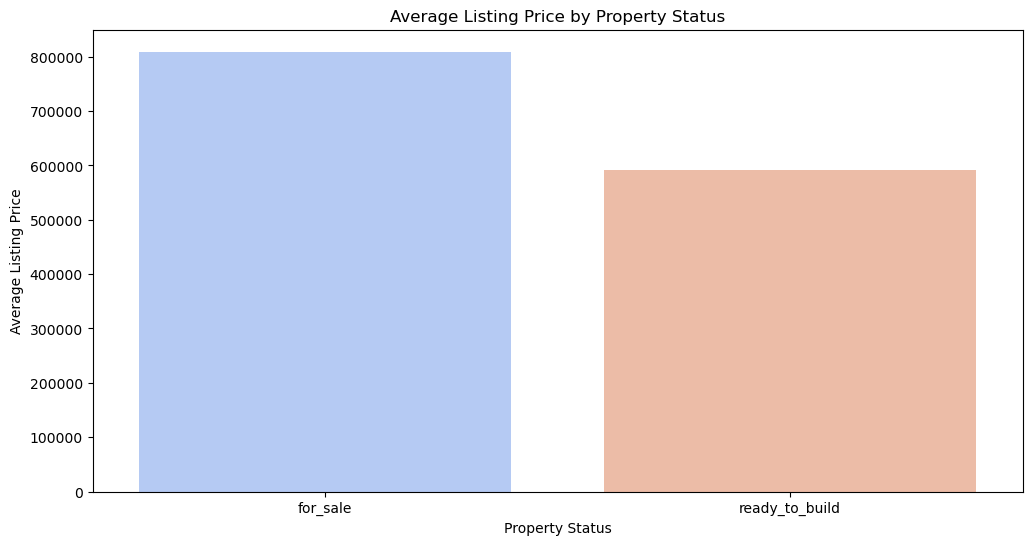

In [39]:
plt.figure(figsize=(12, 6))
sns.barplot(data=cleanedrs_data, x='status', y='listPrice', estimator='mean', ci=None, palette='coolwarm')
plt.title('Average Listing Price by Property Status')
plt.xlabel('Property Status')
plt.ylabel('Average Listing Price')
plt.show()

Properties listed for sale have listing prices mostly in the range of $0 to $800,000, while “ready-to-build” properties are priced lower, ranging from $0 to under $600,000. This distribution suggests that properties ready for immediate occupancy generally command higher prices, likely due to lower uncertainty and faster availability.

## Non-Technical Summary of Findings
The analysis reveals that the average listing price for properties is around $797,000, although most properties are valued under $529,000. Larger properties, especially farms, command significantly higher prices. Properties tend to be newer, with a construction peak around 2003, though there is a wide range from historic to upcoming builds. Interestingly, there’s almost no relationship between lot size and building size, highlighting diversity in property types. Garages appear to be a common amenity but may not strongly influence prices in all cases. Lastly, "for sale" properties generally fetch higher prices compared to "ready-to-build" properties, likely due to the immediate move-in potential.